In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [12]:
from modules.Utils import KETIDB
from modules.KMeans import KMeans
from modules.CommonDatas import SEASONSARR
import IPython
import IPython.display
import pandas as pd
from numpy import dot
from numpy.linalg import norm
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 15.7,13.27
plt.rcParams['font.family'] = 'AppleGothic'

db = KETIDB()
db.connect()

def cosine_similarity(A, B):
    # print(B)
    return dot(A, B) / (norm(A) * norm(B))

connect KETIDB,,,
connect success!!


In [54]:
# Test
datas = db.find_jungang(processing=True)
datas.merging()

new_datas = dict()
for season in SEASONSARR:
    new_datas[season] = datas.merge_datas[season].loc[:,datas.merge_datas[season].columns.year == 2017]
    print("{} data length ==> {} b".format(season, len(new_datas[season].columns)))
    
datas.merge_datas = new_datas

봄 data length ==> 122 b
여름 data length ==> 62 b
가을 data length ==> 91 b
겨울 data length ==> 90 b


2017-01-01 00:00:00
best similarity value ==> 0.9957017564233278
worst similarity value ==> 0.9414841650676056


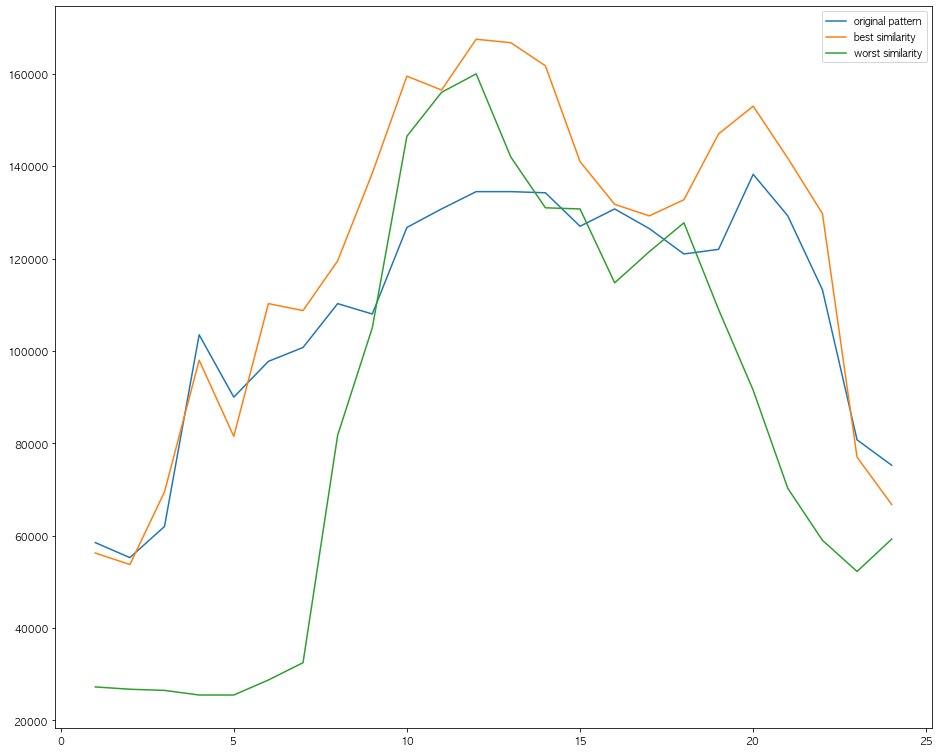

In [56]:
season_target = '겨울'

td = datas.merge_datas[season_target].copy()
rd = pd.DataFrame(columns=['value'])

src_id = td.iloc[:,0].name
src_pt = td.iloc[:,0].values

print(src_id)

for idx in range(1, len(td.columns)):
    tar_pt = td.iloc[:,idx].values
    
    rd.loc[td.columns[idx]] = {
        "value": cosine_similarity(src_pt, tar_pt)
    }
    
best_id = rd.sort_values(by=['value'], ascending=False).index[0]
worst_id = rd.sort_values(by='value', ascending=True).index[0]

print("best similarity value ==>", rd.loc[best_id]['value'])
print("worst similarity value ==>", rd.loc[worst_id]['value'])

timeslot = [_ for _ in range(1, 25)]

plt.plot(timeslot, td[src_id], label="original pattern")
plt.plot(timeslot, td[best_id], label="best similarity")
plt.plot(timeslot, td[worst_id], label="worst similarity")
plt.legend()

plt.show()